In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Mechanics of Outliers

#### What is an Outlier?
As per Wikipedia, 'In statistics, an Outlier is an observation point that is distant from other observations.' The definition suggests to us that an outlier is something which is an odd-one-out or the one that is different from the crowd. Some statisticians define outliers as ‘having a different underlying behavior than the rest of the data’. Alternatively, an outlier is a data point that is distant from other points.

#### How are Outliers introduced in the datasets?

- The Outlier may be due to just variability in the measurement or may indicate experimental errors.

Data can be collected in many ways be it via Interview; Questionnaires & Survey; Observations; Documents & Records; Focus groups; Oral History etc., and in this Tech era Internet; IT sensors etc., are generating data for us. Possible cause of outliers could be Incorrect entry; Misreporting of data or observations; Sampling errors while doing the experiment; Exceptional but True value. If possible, outliers should be excluded from the data set. However, detecting anomalous instances might be difficult, and is not always possible. Data Science Developers and statisticians don’t like to declare outliers too quickly. The ‘too large’ number could be a data entry error, a scale problem, or just a really big number.

#### Type of Outliers
There are mainly 3 types of Outliers.

- Point or global Outliers:  
Observations anomalous with respect to the majority of observations in a feature. In-short, a data point is considered a global outlier if its value is far outside the entirety of the data set in which it is found.

Example: In a class all student age will be approx. similar, but if see a record of a student with age as 500. It’s an outlier. It could be generated due to various reason.

- Contextual (Conditional) Outliers:  
Observations considered anomalous given a specific context. A data point is considered a contextual outlier if its value significantly deviates from the rest of the data points in the same context. Note that this means that same value may not be considered an outlier if it occurred in a different context. If we limit our discussion to time series data, the “context” is almost always temporal, because time series data are records of a specific quantity over time. It’s no surprise then that contextual outliers are common in time series data. In Contextual Anomaly values are not outside the normal global range but are abnormal compared to the seasonal pattern.

Example: World economy falls drastically due to COVID-19. Stock Market crashes due to COVID-19. Usual data points will be near to each other whereas data point during the specific period will either up or down very far. This is not due to erroneous, but it’s an actual observation data point.

- Collective Outliers:  
A collection of observations anomalous but appear close to one another because they all have a similar anomalous value.
A subset of data points within a data set is considered anomalous if those values as a collection deviate significantly from the entire data set, but the values of the individual data points are not themselves anomalous in either a contextual or global sense.

Example: In time series data, one way this can manifest is as normal peaks and valleys occurring outside of a time frame when that seasonal sequence is normal.

### Introduction to Dataset

In [2]:
#import
from sklearn.datasets import load_boston

In [3]:
#about the dataset
print(load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston = load_boston()

In [5]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Why is it important to identify the outliers?

Machine learning algorithms are sensitive to the range and distribution of attribute values. Data outliers can spoil and mislead the training process resulting in longer training times, less accurate models and ultimately poorer results. But not all algorithms are sensitive to outliers. It depends on the mathematics followed by the model.


#### Examples of some machine learning models

1. Naivye Bayes Classifier --------------- Not Sensitive To Outliers
2. SVM ----------------------------------- Not Sensitive To Outliers          
3. Linear Regression --------------------- Sensitive To Outliers
4. Logistic Regression ------------------- Sensitive To Outliers
5. Decision Tree Regressor or Classifier - Not Sensitive To Outliers
6. Ensemble(RF,XGboost,GB) --------------- Not Sensitive To Outliers
7. KNN ----------------------------------- Not Sensitive To Outliers (for larger values of K)
8. Kmeans -------------------------------- Sensitive To Outliers
9. Hierarichal --------------------------- Sensitive To Outliers
10. PCA ----------------------------------- Sensitive To Outliers
11. Neural Networks ----------------------- Sensitive To Outliers


### Detecting Outliers:

We will use this function later in the notebook to print out values of outliers.

In [6]:
def outliers(df, variable, ub, lb):
    print("\nOutliers Detected:")
    outlier = df.loc[(df[variable] > ub) | (df[variable] < lb), variable].sort_values()
    print(outlier)
    print("\nTotal number of ourliers detected:", len(outlier))

#### A. When variable is Gaussian Distributed:

Note that RM: Average number of rooms per dwelling appears normally distributed. Also, it cannot have negative value. 

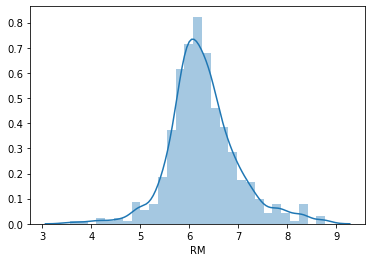

In [7]:
sns.distplot(boston_df.RM)

In [8]:
boston_df.RM.describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

Note that difference between 75% amd max is comparable with 25% and min, it helps us to infer that data is not significantly skewed in any direction.

##### 1. Mean +/-  n Standard Deviation Method

In [9]:
# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

upper_boundary = boston_df.RM.mean() + 3*boston_df.RM.std() #we have taken n=3
lower_boundary = boston_df.RM.mean() - 3*boston_df.RM.std()

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.176782957105816
Upper Boundary: 8.392485817597757


In [10]:
# print out the outliers
outliers(boston_df, "RM", upper_boundary, lower_boundary)


Outliers Detected:
365    3.561
367    3.863
374    4.138
406    4.138
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 8


##### 2. IQR Method

In [11]:
# compute the Interquantile range to calculate the boundaries
IQR = boston_df.RM.quantile(0.75) - boston_df.RM.quantile(0.25)

In [12]:
lower_boundary = boston_df.RM.quantile(0.25) - (IQR*1.5) #for normally distributed data, we multiply IQR with 1.5
upper_boundary = boston_df.RM.quantile(0.75) + (IQR*1.5)

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.778500000000001
Upper Boundary: 7.730499999999999


In [13]:
# print out the outliers
outliers(boston_df, "RM", upper_boundary, lower_boundary)


Outliers Detected:
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 30


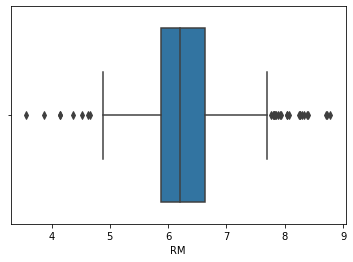

In [14]:
# we can verify the boundaries in boxplot below
sns.boxplot(boston_df.RM)

##### 3. MAD method

In [15]:
# compute the difference between the series and its median
diff_RM = abs(boston_df.RM - boston_df.RM.median())
diff_RM

0      0.3665
1      0.2125
2      0.9765
3      0.7895
4      0.9385
        ...  
501    0.3845
502    0.0885
503    0.7675
504    0.5855
505    0.1785
Name: RM, Length: 506, dtype: float64

In [16]:
# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

b = 1.4826 # for normally distributed data to calculate MAD we take b=1.4826
MAD = b * diff_RM.median()

upper_boundary = boston_df.RM.median() + 3*MAD
lower_boundary = boston_df.RM.median() - 3*MAD

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.671785100000001
Upper Boundary: 7.745214899999999


In [17]:
# print out the outliers
outliers(boston_df, "RM", upper_boundary, lower_boundary)


Outliers Detected:
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 30


##### 4. Two-stage Thresholding (2T)

###### 4.1. 2T with SD

In [18]:
# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

upper_boundary = boston_df.RM.mean() + 3*boston_df.RM.std()
lower_boundary = boston_df.RM.mean() - 3*boston_df.RM.std()

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.176782957105816
Upper Boundary: 8.392485817597757


In [19]:
# data points after removing the outliers
boston_df_2T = boston_df.loc[(boston_df["RM"] <= upper_boundary) & (boston_df["RM"] >= lower_boundary), :].copy()
len(boston_df_2T)

498

In [20]:
# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

upper_boundary_2T = boston_df_2T.RM.mean() + 3*boston_df_2T.RM.std()
lower_boundary_2T = boston_df_2T.RM.mean() - 3*boston_df_2T.RM.std()

print("Lower Boundary:", lower_boundary_2T)
print("Upper Boundary:", upper_boundary_2T)

# print out the outliers
print("\nWe will determine the outliers using this new boundary with original dataframe")
outliers(boston_df, "RM", upper_boundary_2T, lower_boundary_2T)

Lower Boundary: 4.361124850449117
Upper Boundary: 8.20802374392841

We will determine the outliers using this new boundary with original dataframe

Outliers Detected:
365    3.561
367    3.863
374    4.138
406    4.138
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 14


###### 4.2. 2T with IQR

In [21]:
# compute the Interquantile range to calculate the boundaries
IQR = boston_df.RM.quantile(0.75) - boston_df.RM.quantile(0.25)

lower_boundary = boston_df.RM.quantile(0.25) - (IQR*1.5) #for normally distributed data, we multiply IQR with 1.5
upper_boundary = boston_df.RM.quantile(0.75) + (IQR*1.5)

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.778500000000001
Upper Boundary: 7.730499999999999


In [22]:
# data points after removing the outliers
boston_df_2T = boston_df.loc[(boston_df["RM"] <= upper_boundary) & (boston_df["RM"] >= lower_boundary), :].copy()
len(boston_df_2T)

476

In [23]:
# compute the Interquantile range to calculate the boundaries
IQR_2T = boston_df_2T.RM.quantile(0.75) - boston_df_2T.RM.quantile(0.25)

lower_boundary_2T = boston_df_2T.RM.quantile(0.25) - (IQR_2T*1.5)
upper_boundary_2T = boston_df_2T.RM.quantile(0.75) + (IQR_2T*1.5)

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

# print out the outliers
print("\nWe will determine the outliers using this new boundary with original dataframe")
outliers(boston_df, "RM", upper_boundary_2T, lower_boundary_2T)

Lower Boundary: 4.778500000000001
Upper Boundary: 7.730499999999999

We will determine the outliers using this new boundary with original dataframe

Outliers Detected:
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
388    4.880
202    7.610
282    7.645
228    7.686
273    7.691
180    7.765
162    7.802
280    7.820
98     7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 35


###### 4.3. 2T with MAD

In [24]:
# compute the difference between the series and its median
diff_RM = abs(boston_df.RM - boston_df.RM.median())

# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

b = 1.4826 # for normally distributed data to calculate MAD we take b=1.4826
MAD = b * diff_RM.median()

upper_boundary = boston_df.RM.median() + 3*MAD
lower_boundary = boston_df.RM.median() - 3*MAD

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: 4.671785100000001
Upper Boundary: 7.745214899999999


In [25]:
# data points after removing the outliers
boston_df_2T = boston_df.loc[(boston_df["RM"] <= upper_boundary) & (boston_df["RM"] >= lower_boundary), :].copy()
len(boston_df_2T)

476

In [26]:
# compute the difference between the series and its median
diff_RM_2T = abs(boston_df_2T.RM - boston_df_2T.RM.median())

# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows

b_2T = 1.4826 # for normally distributed data to calculate MAD we take b=1.4826
MAD_2T = b_2T * diff_RM_2T.median()

upper_boundary_2T = boston_df_2T.RM.median() + 3*MAD_2T
lower_boundary_2T = boston_df_2T.RM.median() - 3*MAD_2T

print("Lower Boundary:", lower_boundary_2T)
print("Upper Boundary:", upper_boundary_2T)

# print out the outliers
print("\nWe will determine the outliers using this new boundary with original dataframe")
outliers(boston_df, "RM", upper_boundary_2T, lower_boundary_2T)

Lower Boundary: 4.795786399999999
Upper Boundary: 7.571213600000002

We will determine the outliers using this new boundary with original dataframe

Outliers Detected:
365    3.561
367    3.863
406    4.138
374    4.138
384    4.368
414    4.519
412    4.628
386    4.652
202    7.610
282    7.645
228    7.686
273    7.691
180    7.765
162    7.802
98     7.820
280    7.820
186    7.831
203    7.853
195    7.875
283    7.923
166    7.929
204    8.034
226    8.040
97     8.069
233    8.247
253    8.259
224    8.266
267    8.297
232    8.337
163    8.375
262    8.398
257    8.704
225    8.725
364    8.780
Name: RM, dtype: float64

Total number of ourliers detected: 34


##### 5. Clever Standard Deviation 

In [27]:
boston_df_csd = boston_df.copy()
outliers = list()

# the following code will add the two extreme elements of series to the list of outliers without any computation
outliers.append(boston_df.RM[boston_df.RM.sort_values().index[0]])
outliers.append(boston_df.RM[boston_df.RM.sort_values().index[-1]])

# the code below will point out to every outlier based on clever S.D. except the two extremes
# we have already added them to outlier list without any computation
for k in range(0,len(boston_df)):
    # this part will check from the lower extreme for outliers
    boston_df_csd = boston_df_csd[boston_df_csd.RM.index != boston_df_csd.RM.sort_values().index[0]]
    cv = boston_df_csd.RM.var()
    cm = boston_df_csd.RM.mean()
    if abs(cm-boston_df.RM[boston_df_csd.RM.sort_values().index[0]]) > 2.5*np.sqrt(cv):
        outliers.append(boston_df.RM[boston_df_csd.RM.sort_values().index[0]])
    else:
        print("Process broke at value:", boston_df.RM[boston_df_csd.RM.sort_values().index[0]])
        break
    
    # this part will check from the upper extreme for outliers
    boston_df_csd = boston_df_csd[boston_df_csd.RM.index != boston_df_csd.RM.sort_values().index[-1]]
    cv = boston_df_csd.RM.var()
    cm = boston_df_csd.RM.mean()
    if abs(cm-boston_df.RM[boston_df_csd.RM.sort_values().index[-1]]) > 2.5*np.sqrt(cv):
        outliers.append(boston_df.RM[boston_df_csd.RM.sort_values().index[-1]])
    else:
        print("Process broke at value:", boston_df.RM[boston_df_csd.RM.sort_values().index[-1]])
        break

print("\nOutliers Detected:\n")        
print(outliers)
print("\nTotal number of ourliers detected:", len(outliers))

Process broke at value: 4.88

Outliers Detected:

[3.561, 8.78, 3.863, 8.725, 4.138, 8.704, 4.138, 8.398, 4.368, 8.375, 4.519, 8.337, 4.628, 8.297, 4.652, 8.266]

Total number of ourliers detected: 16


#### B. When variable is not Gaussian Distributed:

Note that CRIM: per capita crime rate by town is right skewed. Also, it cannot have negative value. 

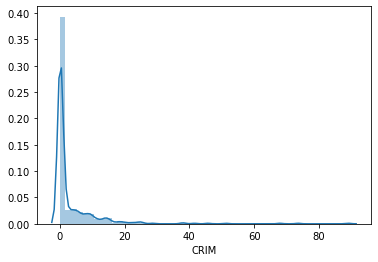

In [28]:
sns.distplot(boston_df.CRIM)

In [29]:
boston_df.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

Note that difference between 75% and max is very big compared to 25% and min, it helps us to infer that data is right skewed.

##### 1. IQR method

In [30]:
# compute the Interquantile range to calculate the boundaries
IQR = boston_df.CRIM.quantile(0.75) - boston_df.CRIM.quantile(0.25)

In [31]:
# Extreme outliers
lower_boundary = boston_df.CRIM.quantile(0.25)-(IQR*3) #for skewed data, we multiply IQR with 3
upper_boundary = boston_df.CRIM.quantile(0.75)+(IQR*3)

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

Lower Boundary: -10.7030675
Upper Boundary: 14.462195000000001


In [32]:
# print out the outliers
outliers(boston_df, "CRIM", upper_boundary, lower_boundary)

TypeError: 'list' object is not callable

In [ ]:
sns.boxplot(boston_df.CRIM, whis=3)

##### 2. MAD method

In [ ]:
# compute the difference between the series and its median
diff_CRIM = abs(boston_df.CRIM - boston_df.CRIM.median())
diff_CRIM

In [ ]:
# Assuming CRIM does not follow Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows
b = 1/boston_df.CRIM.quantile(0.75) # for skewed data to calculate MAD we take b=1/Q(0.75)
MAD = b * diff_CRIM.median()

upper_boundary = boston_df.CRIM.median() + 3*MAD
lower_boundary = boston_df.CRIM.median() - 3*MAD

print("Lower Boundary:", lower_boundary)
print("Upper Boundary:", upper_boundary)

In [ ]:
# print out the outliers
outliers(boston_df, "CRIM", upper_boundary, lower_boundary)

##### 3. Two-stage Thresholding (2T)

###### 3.1. 2T with IQR

In [ ]:
# compute the Interquantile range to calculate the boundaries
IQR = boston_df.CRIM.quantile(0.75) - boston_df.CRIM.quantile(0.25)

lower_boundary = boston_df.CRIM.quantile(0.25) - (IQR*3) #for skewed data, we multiply IQR with 3
upper_boundary = boston_df.CRIM.quantile(0.75) + (IQR*3)

# data points after removing the outliers
boston_df_2T = boston_df.loc[(boston_df["CRIM"] <= upper_boundary) & (boston_df["CRIM"] >= lower_boundary), :].copy()

# compute the Interquantile range to calculate the boundaries
IQR_2T = boston_df_2T.CRIM.quantile(0.75) - boston_df_2T.CRIM.quantile(0.25)

lower_boundary_2T = boston_df_2T.CRIM.quantile(0.25) - (IQR_2T*3) #for skewed data, we multiply IQR with 3
upper_boundary_2T = boston_df_2T.CRIM.quantile(0.75) + (IQR_2T*3)

print("Lower Boundary:", lower_boundary_2T)
print("Upper Boundary:", upper_boundary_2T)

# print out the outliers
print("\nWe will determine the outliers using this new boundary with original dataframe")
outliers(boston_df, "CRIM", upper_boundary_2T, lower_boundary_2T)

###### 3.2 2T with MAD

In [ ]:
# compute the difference between the series and its median
diff_CRIM = abs(boston_df.CRIM - boston_df.CRIM.median())

# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows
b = 1/boston_df.CRIM.quantile(0.75) # for skewed data to calculate MAD we take b=1/Q(0.75)
MAD = b * diff_CRIM.median()

upper_boundary = boston_df.RM.median() + 3*MAD
lower_boundary = boston_df.RM.median() - 3*MAD

# data points after removing the outliers
boston_df_2T = boston_df.loc[(boston_df["CRIM"] <= upper_boundary) & (boston_df["CRIM"] >= lower_boundary), :].copy()

# compute the difference between the series and its median
diff_CRIM_2T = abs(boston_df_2T.CRIM - boston_df_2T.CRIM.median())

# Assuming RM follows a Gaussian Distribution we can calculate the boundaries which differentiates the outliers as follows
b_2T = 1/boston_df_2T.CRIM.quantile(0.75) # for skewed data to calculate MAD we take b=1/Q(0.75)
MAD_2T = b_2T * diff_CRIM_2T.median()

upper_boundary_2T = boston_df_2T.CRIM.median() + 3*MAD_2T
lower_boundary_2T = boston_df_2T.CRIM.median() - 3*MAD_2T

print("Lower Boundary:", lower_boundary_2T)
print("Upper Boundary:", upper_boundary_2T)

# print out the outliers
print("\nWe will determine the outliers using this new boundary with original dataframe")
outliers(boston_df, "CRIM", upper_boundary_2T, lower_boundary_2T)

### What should we do with outliers?

The best way to guard against outliers is your Domain knowledge and experience with outliers.

Here are few tips.

- Drop the outlier records

Sometimes it’s best to completely remove those records from your dataset to stop them from skewing your analysis, specially if we have a large dataset.

- Cap your outliers’ data

Another way to handle true outliers is to cap them. For example, if you’re using income, you might find that people above a certain income level behave in the same way as those with a lower income. In this case, you can cap the income value at a level that keeps that intact.

- Assign a new value

If an outlier seems to be due to a mistake in your data, try imputing a new value. Common imputation methods include using the mean of a variable or utilizing a regression model to predict the missing value.

In [ ]:
df = boston_df.copy()
df.head()

For RM:Average number of rooms per dwelling:

In [ ]:
df.loc[df["RM"] >= 8, "RM"] = 8
df.loc[df["RM"] <= 4, "RM"] = 4

In [ ]:
df["RM"].describe()

In [ ]:
sns.distplot(df.RM)

For CRIM:per capita crime rate by town:

In [ ]:
df.loc[df["CRIM"] >= 15, "CRIM"] = 15

In [ ]:
df["CRIM"].describe()

In [ ]:
sns.distplot(df.CRIM)